# WeatherPy
----

#### Four Observable Trends
* The closer the equator, the higher the temperature.
* Humidity and latitude showed low correlation.
* Cloudiness and latitude showed low correlation.
* Wind speed and latitude showed the lowest correlation. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



600

In [3]:
weather_summary_df = pd.DataFrame(columns=["City",'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
weather_summary_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

print("Beginning Data Retrieval")
print("-------------------------")

ind = 0
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        results = response['name']
        print (f"Processing Record {ind+1} |{results}")
        weather_summary_df.loc[ind,'City'] = results
        weather_summary_df.loc[ind,'Lat'] = response["coord"]["lat"]
        weather_summary_df.loc[ind,'Lng'] = response["coord"]["lon"]
        weather_summary_df.loc[ind,'Max Temp'] = response['main']['temp_max']
        weather_summary_df.loc[ind,'Humidity'] = response['main']['humidity']
        weather_summary_df.loc[ind,'Cloudiness'] = response['clouds']['all']
        weather_summary_df.loc[ind,'Wind Speed'] = response['wind']['speed']
        weather_summary_df.loc[ind,'Country'] = response['sys']['country']
        weather_summary_df.loc[ind,'Date'] = response['dt']
        ind += 1
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")


Beginning Data Retrieval
-------------------------
Processing Record 1 |Upernavik
Processing Record 2 |Mahébourg
Processing Record 3 |Saint Paul Harbor
Processing Record 4 |Saint-Augustin
Processing Record 5 |Dustlik
City not found. Skipping...
Processing Record 6 |Ushuaia
Processing Record 7 |Greenville
Processing Record 8 |Bengkulu
Processing Record 9 |Colac
Processing Record 10 |Kirakira
Processing Record 11 |Raja
Processing Record 12 |Lebu
Processing Record 13 |Ullapool
Processing Record 14 |Cabo San Lucas
Processing Record 15 |Kasongo
Processing Record 16 |Yenagoa
Processing Record 17 |Rikitea
Processing Record 18 |Pevek
Processing Record 19 |Cape Town
Processing Record 20 |Chokurdakh
Processing Record 21 |Nanortalik
Processing Record 22 |Kavieng
Processing Record 23 |Aklavik
Processing Record 24 |Arica
Processing Record 25 |Ambatofinandrahana
Processing Record 26 |Kenai
Processing Record 27 |Tiksi
City not found. Skipping...
Processing Record 28 |Butaritari
Processing Record 29 |

Processing Record 242 |St. George's
Processing Record 243 |Grand Gaube
Processing Record 244 |Bonavista
Processing Record 245 |Brandenburg
Processing Record 246 |Margate
Processing Record 247 |Zhigansk
City not found. Skipping...
Processing Record 248 |Leningradskiy
Processing Record 249 |Kedrovyy
Processing Record 250 |Naze
Processing Record 251 |Ashland
City not found. Skipping...
City not found. Skipping...
Processing Record 252 |Kandrian
Processing Record 253 |Geraldton
Processing Record 254 |Jinchang
Processing Record 255 |Saldanha
Processing Record 256 |Dafeng
Processing Record 257 |Lindenwold
Processing Record 258 |Airai
Processing Record 259 |Aykhal
Processing Record 260 |Mandalgovi
Processing Record 261 |Samarai
Processing Record 262 |Thunder Bay
Processing Record 263 |Taikang
Processing Record 264 |The Valley
Processing Record 265 |Iqaluit
Processing Record 266 |Bereda
Processing Record 267 |Hofn
Processing Record 268 |Nouadhibou
Processing Record 269 |Vestmannaeyjar
Processi

Processing Record 478 |Roald
Processing Record 479 |Sisimiut
Processing Record 480 |Phalaborwa
Processing Record 481 |Jaru
Processing Record 482 |Iranshahr
Processing Record 483 |Tual
Processing Record 484 |Nicoya
Processing Record 485 |Siilinjärvi
Processing Record 486 |Aswān
Processing Record 487 |Turaif
Processing Record 488 |Pacific Grove
Processing Record 489 |Zárate
Processing Record 490 |Vao
Processing Record 491 |Ürümqi
Processing Record 492 |Gijang
Processing Record 493 |Mâncio Lima
Processing Record 494 |Tai’an
Processing Record 495 |Quatre Cocos
Processing Record 496 |San Carlos
Processing Record 497 |Ostróda
Processing Record 498 |Casablanca
Processing Record 499 |Teya
Processing Record 500 |Launceston
Processing Record 501 |Muroto-misakicho
Processing Record 502 |Borogontsy
Processing Record 503 |Tres Palos
Processing Record 504 |Baculin
Processing Record 505 |Lima
Processing Record 506 |Megion
Processing Record 507 |Inhapim
Processing Record 508 |Dalbandin
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_summary_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.79,-56.15,272.16,98,100,5.73,GL,1589607105
1,Mahébourg,-20.41,57.7,295.15,83,20,1.5,MU,1589607105
2,Saint Paul Harbor,57.79,-152.41,281.15,87,90,6.7,US,1589607105
3,Saint-Augustin,51.23,-58.65,273.84,93,27,3.7,CA,1589607106
4,Dustlik,40.52,68.04,295.36,48,100,0.67,UZ,1589607106


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_df = weather_summary_df[weather_summary_df["Humidity"] >100]
humidity_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_data = weather_summary_df[weather_summary_df["Humidity"] <= 100]
clean_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.79,-56.15,272.16,98,100,5.73,GL,1589607105
1,Mahébourg,-20.41,57.7,295.15,83,20,1.5,MU,1589607105
2,Saint Paul Harbor,57.79,-152.41,281.15,87,90,6.7,US,1589607105
3,Saint-Augustin,51.23,-58.65,273.84,93,27,3.7,CA,1589607106
4,Dustlik,40.52,68.04,295.36,48,100,0.67,UZ,1589607106


In [10]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_data.to_csv("cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

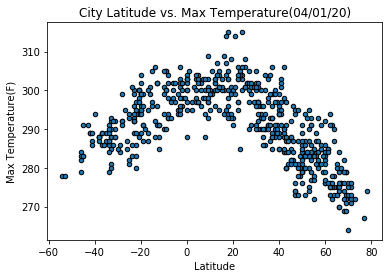

The nearer the equator, the higher the temperature.


In [11]:
clean_data["Lat"] = clean_data["Lat"].astype(int)
clean_data["Max Temp"] = clean_data["Max Temp"].astype(int)
clean_data.plot.scatter(x='Lat',y='Max Temp',marker="o", facecolors="tab:blue",edgecolor='black')

plt.title("City Latitude vs. Max Temperature(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.show()
print("The nearer the equator, the higher the temperature.")

## Latitude vs. Humidity Plot

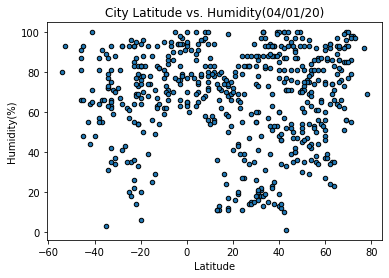

Humidity and latitude show low correlation.


In [12]:
clean_data["Humidity"] = clean_data["Humidity"].astype(int)
clean_data.plot.scatter(x='Lat',y='Humidity',marker="o", facecolors="tab:blue",edgecolor='black')

plt.title("City Latitude vs. Humidity(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()
print("Humidity and latitude show low correlation.")

## Latitude vs. Cloudiness Plot

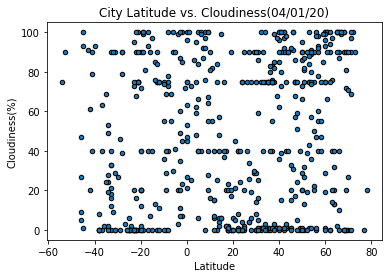

Cloudiness doesn't seem to have anything to do with latitude. It's spread all over the place.


In [13]:
clean_data["Cloudiness"] = clean_data["Cloudiness"].astype(int)

clean_data.plot.scatter(x='Lat',y='Cloudiness',marker="o", facecolors="tab:blue",edgecolor='black')

plt.title("City Latitude vs. Cloudiness(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()
print("Cloudiness doesn't seem to have anything to do with latitude. It's spread all over the place.")

## Latitude vs. Wind Speed Plot

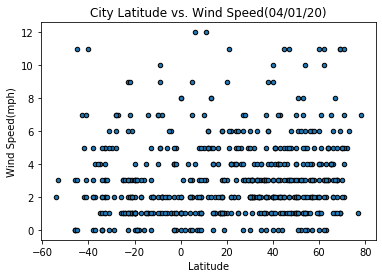

Wind speed doesn't seem to have anything to do with latitude.It's spread all over the place.


In [14]:
clean_data["Wind Speed"] = clean_data["Wind Speed"].astype(int)

clean_data.plot.scatter(x='Lat',y='Wind Speed',marker="o", facecolors="tab:blue",edgecolor='black')

plt.title("City Latitude vs. Wind Speed(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()
print("Wind speed doesn't seem to have anything to do with latitude.It's spread all over the place.")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [16]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Ham = clean_data[clean_data["Lat"] >= 0]
Northern_Ham
Southern_Ham = clean_data[clean_data["Lat"] < 0]
Southern_Ham.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Mahébourg,-20,57.7,295,83,20,1,MU,1589607105
5,Ushuaia,-54,-68.3,278,80,75,2,AR,1589606842
7,Bengkulu,-3,102.27,303,66,35,4,ID,1589607107
8,Colac,-38,143.58,288,64,0,0,AU,1589607107
9,Kirakira,-10,161.92,301,81,36,4,SB,1589607107


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is:0.6635447493344823


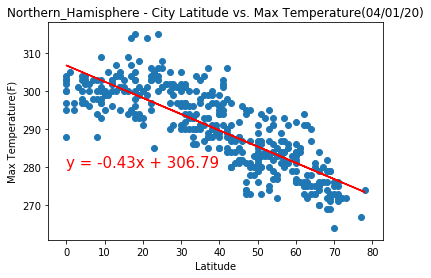

In [17]:
x_values = Northern_Ham["Lat"]
y_values = Northern_Ham["Max Temp"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is:{rvalue**2}")
plt.scatter(x_values,y_values,marker="o", facecolors="tab:blue")
plt.annotate(line_eq,(0,280),fontsize=15,color="red")
plt.title("Northern_Hamisphere - City Latitude vs. Max Temperature(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is:0.4733874959031539


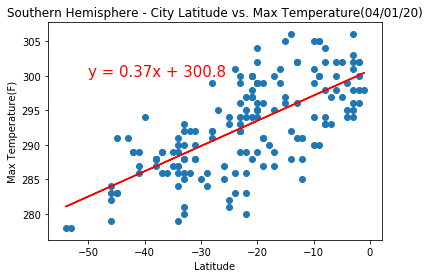

In [18]:
x_values = Southern_Ham["Lat"]
y_values = Southern_Ham["Max Temp"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is:{rvalue**2}")
plt.scatter(x_values,y_values,marker="o", facecolors="tab:blue")
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.show()



Temperature and latitude seem to be correlated. r-squared value of northern hemisphere is higher(0.77) than r-squared value of sourthern hemisphere(0.66).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is:0.0044122443047461095


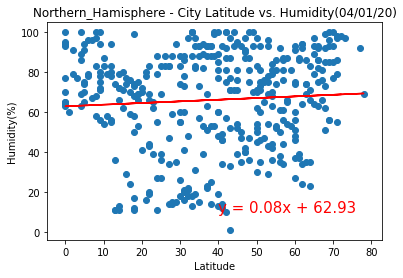

In [19]:
x_values = Northern_Ham["Lat"]
y_values = Northern_Ham["Humidity"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is:{rvalue**2}")
plt.scatter(x_values,y_values,marker="o", facecolors="tab:blue")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern_Hamisphere - City Latitude vs. Humidity(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is:0.03567564691356182


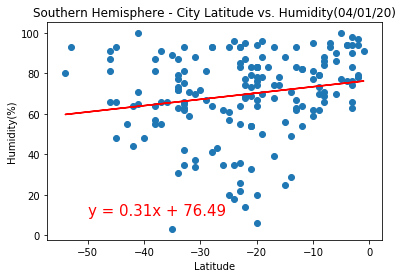

In [20]:
x_values = Southern_Ham["Lat"]
y_values = Southern_Ham["Humidity"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is:{rvalue**2}")
plt.scatter(x_values,y_values,marker="o", facecolors="tab:blue")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Humidity(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

Humidity and latitude don't seem to be correlated in both the northern and southern hemispheres.Both show low r-squared value.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is:0.022168642767719814


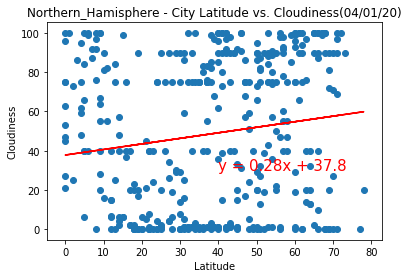

In [21]:
x_values = Northern_Ham["Lat"]
y_values = Northern_Ham["Cloudiness"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is:{rvalue**2}")
plt.scatter(x_values,y_values,marker="o", facecolors="tab:blue")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title("Northern_Hamisphere - City Latitude vs. Cloudiness(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is:0.02227004981046558


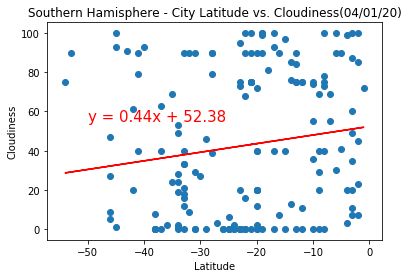

In [22]:
x_values = Southern_Ham["Lat"]
y_values = Southern_Ham["Cloudiness"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is:{rvalue**2}")
plt.scatter(x_values,y_values,marker="o", facecolors="tab:blue")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Southern Hamisphere - City Latitude vs. Cloudiness(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

Cloudiness and latitude don't seem to be correlated in both the northern and southern hemispheres.Both show very low r-squared value, especially in the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is:0.009942497146474917


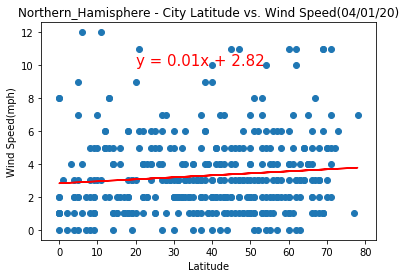

In [23]:
x_values = Northern_Ham["Lat"]
y_values = Northern_Ham["Wind Speed"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is:{rvalue**2}")
plt.scatter(x_values,y_values,marker="o", facecolors="tab:blue")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.title("Northern_Hamisphere - City Latitude vs. Wind Speed(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is:0.0013493731507346976


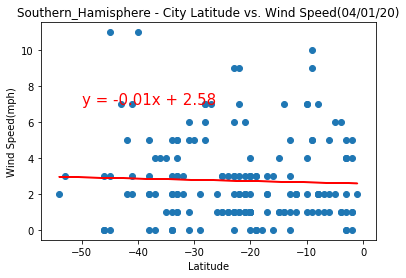

In [24]:
x_values = Southern_Ham["Lat"]
y_values = Southern_Ham["Wind Speed"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is:{rvalue**2}")
plt.scatter(x_values,y_values,marker="o", facecolors="tab:blue")
plt.annotate(line_eq,(-50,7),fontsize=15,color="red")
plt.title("Southern_Hamisphere - City Latitude vs. Wind Speed(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()

Wind Speed and latitude don't seem to be correlated at all in both the northern and southern hemispheres.Both show very low r-squared value.